# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras import Model, models, Sequential, layers, losses
from keras.datasets import fashion_mnist

# Load Dataset
Using the Fashion dataset MNIST, 28x28 pixels.

In [108]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


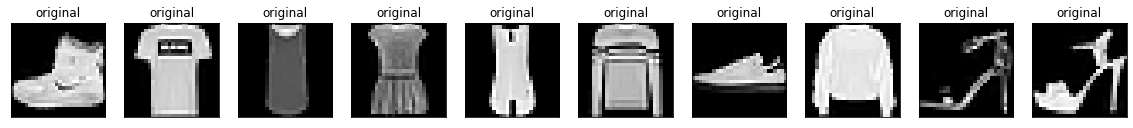

In [38]:
n = 10
plt.figure(figsize = (2 * n, 2))

for i in range(n):
    # display training datasets
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_train[i], cmap = "gray")
    plt.title("original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Auto Encoder Model
## Create and Compile the Model

In [35]:
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__(name = "auto_encoder")
        
        self.encoder = Sequential([
            layers.Flatten(),
            layers.Dense(128, activation = "relu"),
            layers.Dense(64, activation = "relu"),
            layers.Dense(32, activation = "relu"),
        ])
        
        self.decoder = Sequential([
            layers.Dense(64, activation = "relu"),
            layers.Dense(128, activation = "relu"),
            layers.Dense(784, activation = "sigmoid"),
            layers.Reshape((28, 28)),
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AutoEncoder()
autoencoder.build(input_shape = (None, 28, 28))
print(autoencoder.summary())

autoencoder.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
    loss = losses.MeanSquaredError(),
)

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_39 (Sequential)  (None, 32)                110816    
                                                                 
 sequential_40 (Sequential)  (None, 28, 28)            111568    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________
None


## Train the Autoencoder

In [36]:
history = autoencoder.fit(
    X_train, X_train,
    epochs = 20, verbose = 1, shuffle = True,
    validation_data = (X_test, X_test)
)

Epoch 1/20


2022-06-26 15:59:52.732173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 0.0470

2022-06-26 16:00:04.146258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 6ms/step - loss: 0.0470 - val_loss: 0.0269
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0245 - val_loss: 0.0231
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0221 - val_loss: 0.0213
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0207 - val_loss: 0.0201
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0195 - val_loss: 0.0190
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0185 - val_loss: 0.0182
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0178 - val_loss: 0.0174
Epoch 8/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0171 - val_loss: 0.0169
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0166 - val_loss: 0.0164
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0161

## Encode and Decode the Test Dataset

In [40]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

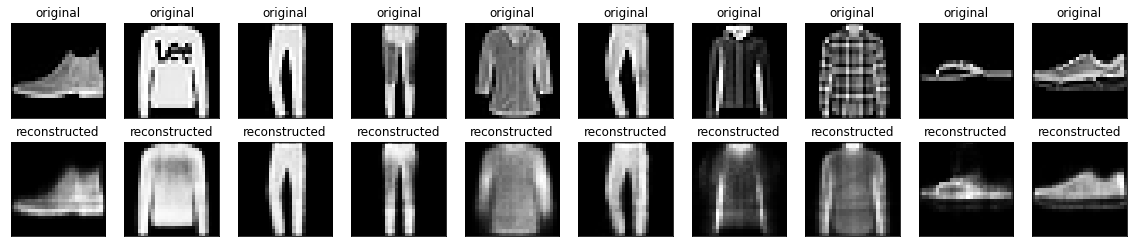

In [48]:
n = 10
plt.figure(figsize = (2 * n, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i], cmap = "gray")
    plt.title("original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i], cmap = "gray")
    plt.title("reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Image Denoising Model
## Add Random Noise to the Images

In [109]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

print(X_train.shape)

(60000, 28, 28, 1)


In [110]:
noise_factor = 0.2

X_train_noisy = X_train + noise_factor * tf.random.normal(shape = X_train.shape)
X_test_noisy = X_test + noise_factor * tf.random.normal(shape = X_test.shape)

X_train_noisy = tf.clip_by_value(X_train_noisy, 0, 1)
X_test_noisy = tf.clip_by_value(X_test_noisy, 0, 1)

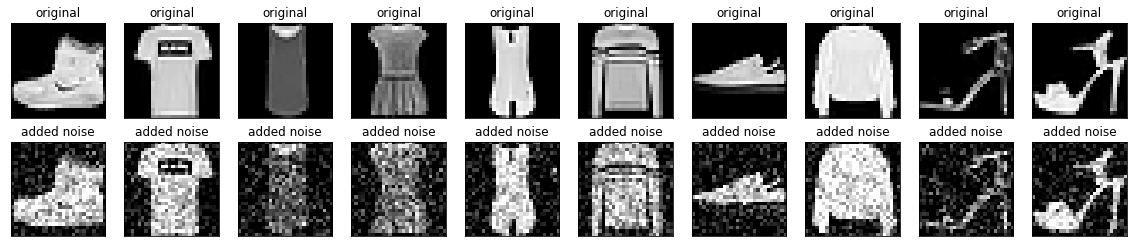

In [111]:
n = 10
plt.figure(figsize = (2 * n, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_train[i], cmap = "gray")
    plt.title("original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(X_train_noisy[i], cmap = "gray")
    plt.title("added noise")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolution Autoencoder

In [112]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__(name = "denoise_autoencoder")
    
        self.encoder = Sequential([
            layers.Input(shape = (28, 28, 1)),
            layers.Conv2D(32, (3, 3), activation = "relu", padding = "same"),
            layers.Conv2D(16, (3, 3), activation = "relu", padding = "same"),
            layers.Conv2D(8, (3, 3), activation = "relu", padding = "same"),
        ])
        
        self.decoder = Sequential([
            layers.Conv2DTranspose(8, kernel_size = 3, activation = "relu", padding = "same"),
            layers.Conv2DTranspose(16, kernel_size = 3, activation = "relu", padding = "same"),
            layers.Conv2DTranspose(32, kernel_size = 3, activation = "relu", padding = "same"),
            layers.Conv2D(1, kernel_size = (3, 3), activation = "sigmoid", padding = "same"),
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Denoise()
# autoencoder.build(input_shape = (None, 28, 28, 1))

autoencoder.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
    loss = losses.MeanSquaredError()
)

## Train Denoise Model

In [113]:
history = autoencoder.fit(
    X_train_noisy, X_train,
    batch_size = 64, epochs = 20, verbose = 1, shuffle = True,
    validation_data = (X_test_noisy, X_test),
)

Epoch 1/20


2022-06-26 18:08:39.835723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.0282

2022-06-26 18:08:51.000424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 12s 13ms/step - loss: 0.0282 - val_loss: 0.0085
Epoch 2/20
938/938 [==============================] - 12s 13ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 3/20
938/938 [==============================] - 12s 13ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 4/20
938/938 [==============================] - 12s 13ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 5/20
938/938 [==============================] - 12s 12ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 6/20
938/938 [==============================] - 12s 13ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 7/20
938/938 [==============================] - 12s 12ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 8/20
938/938 [==============================] - 12s 12ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 9/20
938/938 [==============================] - 12s 12ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 10/20
938/938 [==============================] - 12s 13ms/step - loss: 0.0054 - val_los

## Plot both Noisy and Denoised Images by the Autoencoder

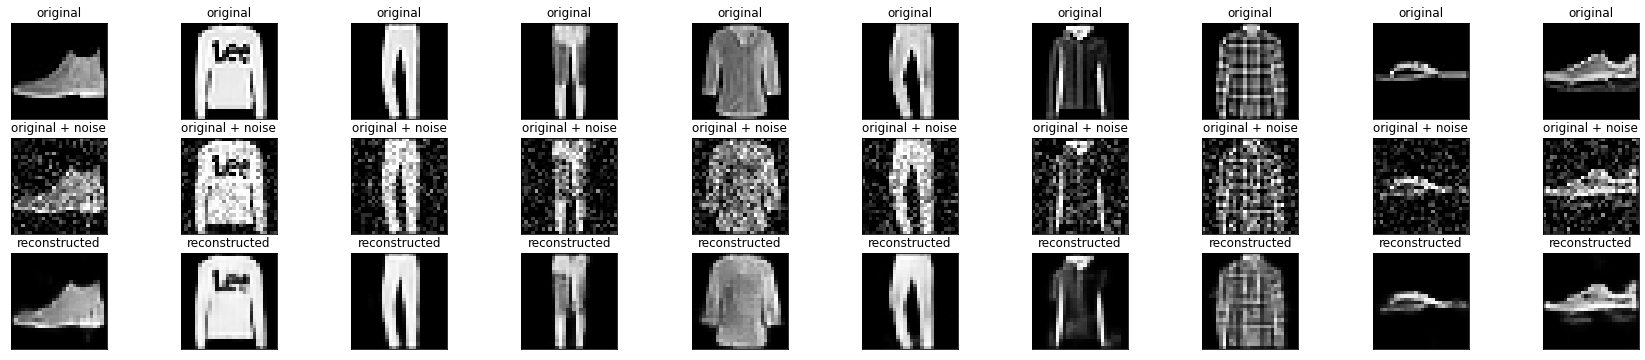

In [117]:
encoded_imgs = autoencoder.encoder(X_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize = (30, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(X_test[i]), cmap = "gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(X_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

# Anomaly Detection
## Load ECG Dataset

In [118]:
df = pd.read_csv("http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv", header = None)
raw_data = df.values
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [119]:
labels = raw_data[:, -1]
data = raw_data[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(
    data, labels,
    test_size = 0.2, random_state = 21
)

## Normalize the Distribution

In [120]:
min_val = tf.reduce_min(X_train)
max_val = tf.reduce_max(X_train)

X_train = (X_train - min_val) / (max_val - min_val)
X_test = (X_test - min_val) / (max_val - min_val)

X_train = tf.cast(X_train, tf.float32)
X_test = tf.cast(X_test, tf.float32)

## Only Use Normal Rhythms to Train
Use boolean type then separate the noraml rhythms from the abnormal rhythms.

In [121]:
y_train = y_train.astype(bool)
y_test = y_test.astype(bool)

normal_X_train = X_train[y_train]
normal_X_test = X_test[y_test]

anomalous_X_train = X_train[~y_train]
anomalous_X_test = X_test[~y_test]

## Plot ECG
### Normal ECG

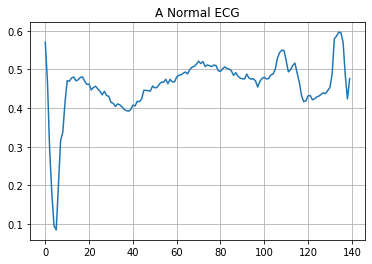

In [122]:
plt.grid()
plt.plot(np.arange(140), normal_X_train[0])
plt.title("A Normal ECG")
plt.show()

### Anomalous ECG

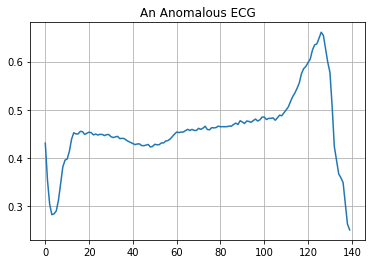

In [123]:
plt.grid()
plt.plot(np.arange(140), anomalous_X_train[0])
plt.title("An Anomalous ECG")
plt.show()

## Build the Model

In [124]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__(name = "anomaly_detector")
    
        self.encoder = Sequential([
            layers.Dense(32, activation = "relu"),
            layers.Dense(16, activation = "relu"),
            layers.Dense(8, activation = "relu"),
        ])

        self.decoder = Sequential([
            layers.Dense(16, activation = "relu"),
            layers.Dense(32, activation = "relu"),
            layers.Dense(140, activation = "sigmoid"),
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()
autoencoder.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4),
    loss = losses.MeanAbsoluteError(),
)

## Train the Model

In [125]:
history = autoencoder.fit(
    normal_X_train, normal_X_train,
    epochs = 40, batch_size = 128, shuffle = True,
    validation_data = (X_test, X_test)
)

Epoch 1/40
 9/19 [=============>................] - ETA: 0s - loss: 0.0623

2022-06-26 18:27:50.097363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 1s 17ms/step - loss: 0.0612 - val_loss: 0.0571
Epoch 2/40
 7/19 [==========>...................] - ETA: 0s - loss: 0.0588

2022-06-26 18:27:50.413602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 10ms/step - loss: 0.0582 - val_loss: 0.0545
Epoch 3/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0569 - val_loss: 0.0536
Epoch 4/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0562 - val_loss: 0.0531
Epoch 5/40
19/19 [==============================] - 0s 9ms/step - loss: 0.0554 - val_loss: 0.0526
Epoch 6/40
19/19 [==============================] - 0s 10ms/step - loss: 0.0545 - val_loss: 0.0521
Epoch 7/40
19/19 [==============================] - 0s 9ms/step - loss: 0.0534 - val_loss: 0.0514
Epoch 8/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0521 - val_loss: 0.0506
Epoch 9/40
19/19 [==============================] - 0s 9ms/step - loss: 0.0505 - val_loss: 0.0497
Epoch 10/40
19/19 [==============================] - 0s 8ms/step - loss: 0.0486 - val_loss: 0.0486
Epoch 11/40
19/19 [==============================] - 0s 9ms/step - loss: 0.0463 - val_loss: 0.0474
Epoch 12/40
19/19 [========

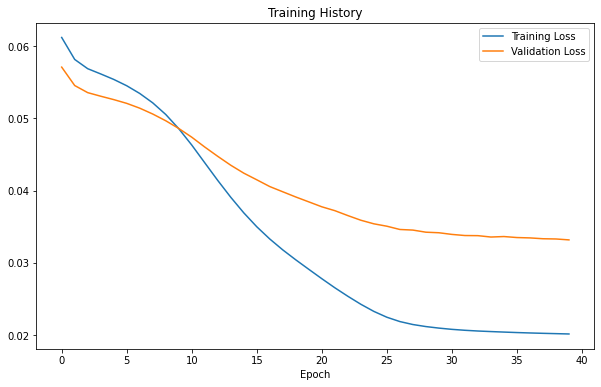

In [126]:
plt.figure(figsize = (10, 6))
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training History")
plt.xlabel("Epoch")
plt.legend()
plt.show()

## Plot Reconstructed ECG
### A noraml ECG plot

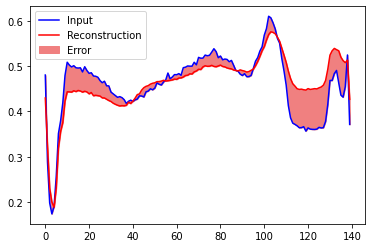

In [127]:
encoded_data = autoencoder.encoder(normal_X_test).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_X_test[0], color = "blue")
plt.plot(decoded_data[0], color = "red")
plt.fill_between(np.arange(140), decoded_data[0], normal_X_test[0], color = "lightcoral")
plt.legend(labels = ["Input", "Reconstruction", "Error"])
plt.show()

### An anomalous ECG plot

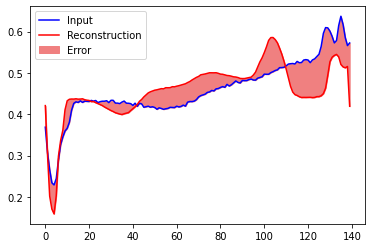

In [129]:
encoded_data = autoencoder.encoder(anomalous_X_test).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_X_test[0], color = "blue")
plt.plot(decoded_data[0], color = "red")
plt.fill_between(np.arange(140), anomalous_X_test[0], decoded_data[0], color = "lightcoral")
plt.legend(labels = ["Input", "Reconstruction", "Error"])
plt.show()

## Detect Anomalies
Detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold.
### Set Threshold

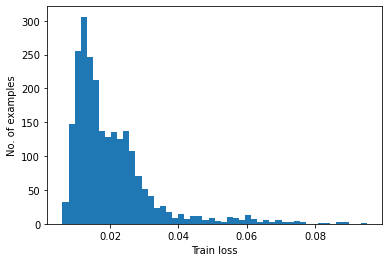

In [135]:
reconstructions = autoencoder.predict(normal_X_train)
train_loss = losses.mae(normal_X_train, reconstructions)

plt.hist(train_loss[None, :], bins = 50)
plt.xlabel("Train loss")
plt.ylabel("No. of examples")
plt.show()

In [136]:
# set the threshold to be mean + 1 * sd
threshold = np.mean(train_loss) + np.std(train_loss)
print(f"Threshold = {threshold}")

Threshold = 0.03195711597800255


### Predict on Test Data

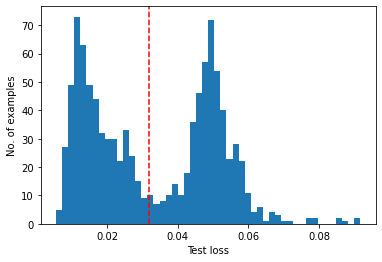

In [142]:
reconstructions = autoencoder.predict(X_test)
test_loss = losses.mae(X_test, reconstructions)

plt.hist(test_loss[None, :], bins = 50)
plt.xlabel("Test loss")
plt.ylabel("No. of examples")

plt.axvline(threshold, color = "red", linestyle = "--", label = "threshold")
plt.show()

### Define a Predict Function
A function to return 0 or 1

In [143]:
def predict(model, data, threshold):
    reconstructions = model.predict(data, verbose = 1)
    loss = losses.mae(data, reconstructions)
    # less than threshold       -> 1: normal
    # greater than threshold    -> 0: anomalous
    return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
    print(f"Accuracy = {accuracy_score(labels, predictions)}")
    print(f"Precision = {precision_score(labels, predictions)}")
    print(f"Recall = {recall_score(labels, predictions)}")

In [144]:
preds = predict(autoencoder, X_test, threshold = threshold)
print_stats(preds, y_test)

32/32 [==============================] - 0s 3ms/step
Accuracy = 0.944
Precision = 0.9941176470588236
Recall = 0.9053571428571429
